# Visualizing simulation snapshots

Use nglview to visualize snapshots of polymer configurations. TODO: make production quality versions in blender

In [5]:
#Here are the import statements sameer used in his notebook to analyze a simulation
import os
os.chdir("/home/dkannan/git-remotes/polychrom/")
from pathlib import Path
import importlib as imp
from collections import defaultdict
import h5py
import json
from copy import deepcopy
import multiprocessing as mp

import matplotlib as mpl
import matplotlib.pyplot as plt

from numba import jit
import numpy as np
import numpy.ma as ma
import pandas as pd
import scipy
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d, interp2d

import polychrom
from polychrom import polymer_analyses, contactmaps, polymerutils
from polychrom.hdf5_format import list_URIs, load_URI, load_hdf5_file

from cooltools.lib import numutils
from pathlib import Path
from functools import partial

from matplotlib.colors import LogNorm, Normalize
from matplotlib.gridspec import GridSpec

In [6]:
import nglutils as ngu
import nglview as nv

In [26]:
ls data

ABidentities_blobel2021_chr2_35Mb_60Mb.npy
compartment_identities.npy
comp_scores_q25_chr2_blobel.csv
conformations_bcomps_10x.npy
conformations_bcomps_19x.npy
conformations_bcomps_25.666666666666668x.npy
conformations_bcomps_2x.npy
conformations_bcomps_39x.npy
conformations_bcomps_3x.npy
conformations_bcomps_4x.npy
conformations_bcomps_5x.npy
conformations_bcomps_7x.npy
conformations_comps10x.npy
conformations_comps19x.npy
conformations_comps4x.npy
conformations_comps7x.npy
conformations_Deq1.npy
contact_map_bcomps_10x_cutoff2.0.npy
contact_map_bcomps_19x_cutoff2.0.npy
contact_map_bcomps_25.666666666666668x_cutoff2.0.npy
contact_map_bcomps_2x_cutoff2.0.npy
contact_map_bcomps_39x_cutoff2.0.npy
contact_map_bcomps_3x_cutoff2.0.npy
contact_map_bcomps_4x_cutoff2.0.npy
contact_map_bcomps_5x_cutoff2.0.npy
contact_map_bcomps_7x_cutoff2.0.npy
contactmaps/
mean_squared_separation_bcomps_10x.csv
mean_squared_separation_bcomps_19x.csv
mean_squared_separation_bcomps_25.666666666666668x.csv
mean_sq

## First try example from Simon

In [32]:
conformations_10x = np.load('data/conformations_bcomps_2x.npy')
conf = load_URI(conformations_10x[1])

In [8]:
len(conf['pos'])

1000

In [9]:
view_simple = ngu.xyz2nglview(conf['pos'])
view_simple

NGLWidget()

In [13]:
view = nv.show_pdbid("3pqr") 
view

NGLWidget()

In [14]:
import ipywidgets 
ipywidgets.Text("hello")

Text(value='hello')

# Adding colors for compartment identities

In [22]:
ids = np.load('data/ABidentities_blobel2021_chr2_35Mb_60Mb.npy')
N = len(ids)
print(N)
monomer_ids = np.zeros((N,), dtype=int)
monomer_ids[ids==0] = 1 #type B(cold)
monomer_ids[ids==1] = 0 #type A (hot)
#convert integer monomer types to atom names
monomer_names = ngu.intlist_to_alpha(monomer_ids)
np.sum(monomer_ids)

1000


676

In [18]:
top = ngu.mdtop_for_polymer(N, atom_names=monomer_names)
view = ngu.xyz2nglview(conf['pos'], top=top)
view

NGLWidget()

In [14]:
ngu.rep_add.colormap(view, plt.cm.viridis, '.A', colorMode='rgb')
ngu.rep_add.colormap(view, plt.cm.spring, '.B', colorMode='rgb')

In [33]:
# Usually monochrome is most useful, that's why there is a small helper for that
view.clear_representations()
view = ngu.xyz2nglview(conf['pos'], top=top)
ngu.rep_add.uniform(view, 0xC83835, '.A')
ngu.rep_add.uniform(view, 0x47abd8, '.B')
view

NGLWidget()

In [35]:
view.download_image('snapshot_bcomps_2x_conf1.png', transparent=True, factor=10)

In [34]:
# Show compartments
view.center()
view.clear_representations()
view.add_representation('ball+stick', selection='.A',
                                    colorScheme='uniform',
                                    colorValue=0xff4242)

view.add_representation('ball+stick', selection='.B',
                                      colorScheme='uniform',
                                      colorValue=0x475FD0,
                                      )


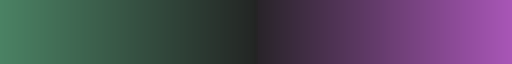

In [48]:
import seaborn as sns
sns.diverging_palette(145, 300, s=60, center="dark", as_cmap=True)